<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.084527,87.621300,71.084931,-157.741854,51.048904,225.805086,-174.756182
1,0.0,1.0,36.984514,69.001506,71.195387,154.792986,341.974393,143.605896,198.368497
2,0.0,2.0,29.002641,52.516165,22.032962,-159.331332,-45.779564,47.867945,-93.647508
3,0.0,3.0,71.767835,63.553258,67.356160,-174.324826,38.352428,276.179407,-237.826979
4,0.0,4.0,94.424272,89.406628,91.107042,224.704244,509.642186,470.837971,38.804215
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.657453,49.346113,40.850897,95.848117,234.702580,125.949412,108.753168
19996,999.0,16.0,65.496566,91.112681,98.989366,203.443215,469.041828,363.317994,105.723834
19997,999.0,17.0,95.088600,60.510366,57.021663,-48.410094,174.210534,209.396331,-35.185796
19998,999.0,18.0,62.162770,31.180357,75.595939,-137.814896,41.124170,166.133180,-125.009009


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.084527,87.621300,71.084931,-157.741854,51.048904,225.805086,-174.756182
1,0.0,1.0,36.984514,69.001506,71.195387,154.792986,341.974393,143.605896,198.368497
2,0.0,2.0,29.002641,52.516165,22.032962,-159.331332,-45.779564,47.867945,-93.647508
3,0.0,3.0,71.767835,63.553258,67.356160,-174.324826,38.352428,276.179407,-237.826979
4,0.0,4.0,94.424272,89.406628,91.107042,224.704244,509.642186,470.837971,38.804215
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.657453,49.346113,40.850897,95.848117,234.702580,125.949412,108.753168
19996,999.0,16.0,65.496566,91.112681,98.989366,203.443215,469.041828,363.317994,105.723834
19997,999.0,17.0,95.088600,60.510366,57.021663,-48.410094,174.210534,209.396331,-35.185796
19998,999.0,18.0,62.162770,31.180357,75.595939,-137.814896,41.124170,166.133180,-125.009009


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    40.084527  87.621300  71.084931 -157.741854   51.048904   
      1.0    36.984514  69.001506  71.195387  154.792986  341.974393   
      2.0    29.002641  52.516165  22.032962 -159.331332  -45.779564   
      3.0    71.767835  63.553258  67.356160 -174.324826   38.352428   
      4.0    94.424272  89.406628  91.107042  224.704244  509.642186   
...                ...        ...        ...         ...         ...   
999.0 15.0   38.657453  49.346113  40.850897   95.848117  234.702580   
      16.0   65.496566  91.112681  98.989366  203.443215  469.041828   
      17.0   95.088600  60.510366  57.021663  -48.410094  174.210534   
      18.0   62.162770  31.180357  75.595939 -137.814896   41.124170   
      19.0   45.994800  42.514986  47.455144  -63.312996   82.651934   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    225.805086 -174.756182  
      1.0    143.605896  198.368497  
      2.0     47.867945  -93.647508  
      3.0    276.179407 -237.826979  
      4.0    470.837971   38.804215  
...                 ...         ...  
999.0 15.0   125.949412  108.753168  
      16.0   363.317994  105.723834  
      17.0   209.396331  -35.185796  
      18.0   166.133180 -125.009009  
      19.0   126.487247  -43.835313  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    40.084527  87.621300  71.084931 -157.741854   51.048904   
      1.0    36.984514  69.001506  71.195387  154.792986  341.974393   
      2.0    29.002641  52.516165  22.032962 -159.331332  -45.779564   
      3.0    71.767835  63.553258  67.356160 -174.324826   38.352428   
      4.0    94.424272  89.406628  91.107042  224.704244  509.642186   
...                ...        ...        ...         ...         ...   
999.0 15.0   38.657453  49.346113  40.850897   95.848117  234.702580   
      16.0   65.496566  91.112681  98.989366  203.443215  469.041828   
      17.0   95.088600  60.510366  57.021663  -48.410094  174.210534   
      18.0   62.162770  31.180357  75.595939 -137.814896   41.124170   
      19.0   45.994800  42.514986  47.455144  -63.312996   82.651934   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    225.805086 -174.756182  
      1.0    143.605896  198.368497  
      2.0     47.867945  -93.647508  
      3.0    276.179407 -237.826979  
      4.0    470.837971   38.804215  
...                 ...         ...  
999.0 15.0   125.949412  108.753168  
      16.0   363.317994  105.723834  
      17.0   209.396331  -35.185796  
      18.0   166.133180 -125.009009  
      19.0   126.487247  -43.835313  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.084527,87.621300,71.084931,-157.741854,51.048904,225.805086,-174.756182
1,0.0,1.0,36.984514,69.001506,71.195387,154.792986,341.974393,143.605896,198.368497
2,0.0,2.0,29.002641,52.516165,22.032962,-159.331332,-45.779564,47.867945,-93.647508
3,0.0,3.0,71.767835,63.553258,67.356160,-174.324826,38.352428,276.179407,-237.826979
4,0.0,4.0,94.424272,89.406628,91.107042,224.704244,509.642186,470.837971,38.804215
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.657453,49.346113,40.850897,95.848117,234.702580,125.949412,108.753168
19996,999.0,16.0,65.496566,91.112681,98.989366,203.443215,469.041828,363.317994,105.723834
19997,999.0,17.0,95.088600,60.510366,57.021663,-48.410094,174.210534,209.396331,-35.185796
19998,999.0,18.0,62.162770,31.180357,75.595939,-137.814896,41.124170,166.133180,-125.009009


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    40.084527  87.621300  71.084931 -157.741854   51.048904   
      1.0    36.984514  69.001506  71.195387  154.792986  341.974393   
      2.0    29.002641  52.516165  22.032962 -159.331332  -45.779564   
      3.0    71.767835  63.553258  67.356160 -174.324826   38.352428   
      4.0    94.424272  89.406628  91.107042  224.704244  509.642186   
...                ...        ...        ...         ...         ...   
999.0 15.0   38.657453  49.346113  40.850897   95.848117  234.702580   
      16.0   65.496566  91.112681  98.989366  203.443215  469.041828   
      17.0   95.088600  60.510366  57.021663  -48.410094  174.210534   
      18.0   62.162770  31.180357  75.595939 -137.814896   41.124170   
      19.0   45.994800  42.514986  47.455144  -63.312996   82.651934   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    225.805086 -174.756182  
      1.0    143.605896  198.368497  
      2.0     47.867945  -93.647508  
      3.0    276.179407 -237.826979  
      4.0    470.837971   38.804215  
...                 ...         ...  
999.0 15.0   125.949412  108.753168  
      16.0   363.317994  105.723834  
      17.0   209.396331  -35.185796  
      18.0   166.133180 -125.009009  
      19.0   126.487247  -43.835313  

[20000 rows x 7 columns]

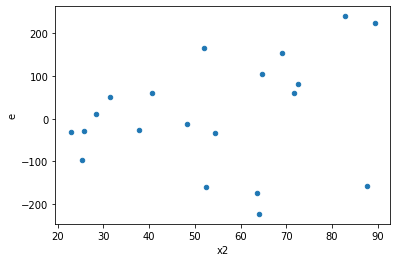

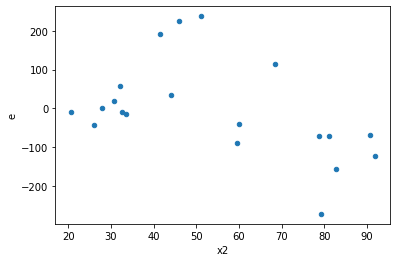

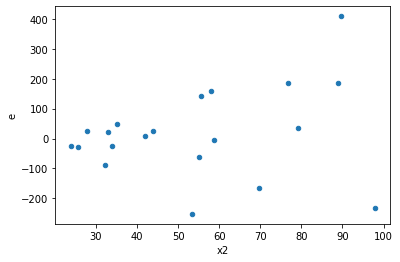

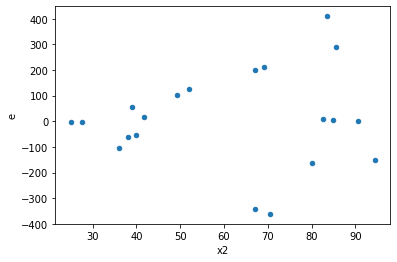

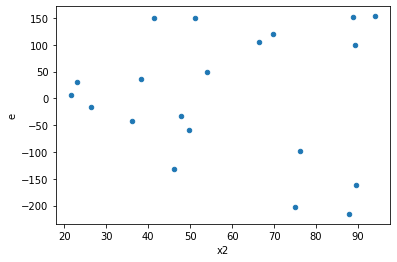

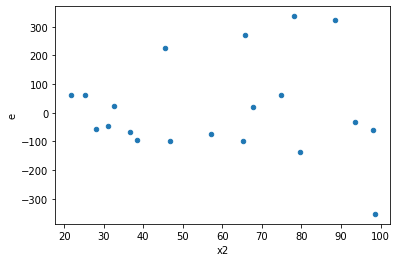

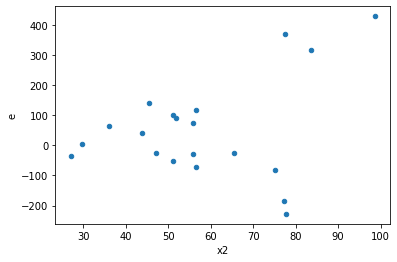

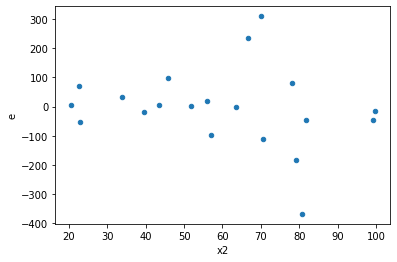

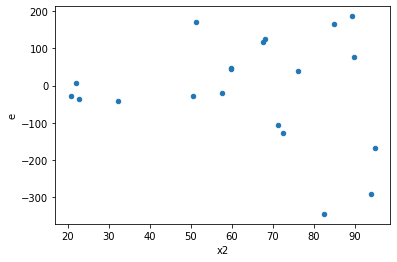

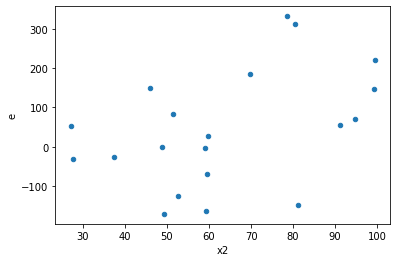

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,33993.40246097372,48373.448279465825,6798.680492194743,9674.689655893166,1.4230246099960482,0.7081108891368948,0.6459445554315526,0.3540554445684474,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,89851.68503598102,93434.72138508965,17970.337007196205,18686.94427701793,1.0398772304345076,0.9668192020966,0.5165903989517,0.4834096010483,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,12045.122198043391,225508.09596583317,2409.024439608678,45101.61919316663,18.721943394020915,0.005951731292286988,0.9970241343538565,0.002975865646143494,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,90974.22372953218,362100.9882285943,18194.844745906437,72420.19764571886,3.98025916995045,0.15575845867532445,0.9221207706623378,0.07787922933766223,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,7522.902328957285,136248.17693141152,1504.580465791457,27249.635386282305,18.111118684468718,0.00642718471187842,0.9967864076440608,0.00321359235593921,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,11958.558121997106,105147.55818190695,2391.7116243994215,21029.51163638139,8.792661883583927,0.032324172188556766,0.9838379139057216,0.016162086094278383,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,27138.262401922246,200239.70236048682,5427.6524803844495,40047.94047209736,7.378501224393184,0.04679401966348973,0.9766029901682551,0.023397009831744864,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,40113.561932623255,92686.3809396564,8022.712386524651,18537.276187931282,2.3105996195335905,0.37933469098853445,0.8103326545057328,0.18966734549426723,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,9715.350857200374,147752.92475870947,1943.0701714400748,29550.584951741894,15.20819236797864,0.009602020244078302,0.9951989898779608,0.004801010122039151,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,33993.40246097372,48373.448279465825,6798.680492194743,9674.689655893166,1.4230246099960482,0.7081108891368948,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,89851.68503598102,93434.72138508965,17970.337007196205,18686.94427701793,1.0398772304345076,0.9668192020966,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,12045.122198043391,225508.09596583317,2409.024439608678,45101.61919316663,18.721943394020915,0.005951731292286988,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,90974.22372953218,362100.9882285943,18194.844745906437,72420.19764571886,3.98025916995045,0.15575845867532445,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,7522.902328957285,136248.17693141152,1504.580465791457,27249.635386282305,18.111118684468718,0.00642718471187842,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,11958.558121997106,105147.55818190695,2391.7116243994215,21029.51163638139,8.792661883583927,0.032324172188556766,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,27138.262401922246,200239.70236048682,5427.6524803844495,40047.94047209736,7.378501224393184,0.04679401966348973,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,40113.561932623255,92686.3809396564,8022.712386524651,18537.276187931282,2.3105996195335905,0.37933469098853445,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,9715.350857200374,147752.92475870947,1943.0701714400748,29550.584951741894,15.20819236797864,0.009602020244078302,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      905
Reject001=0 : Heteroscedasticity     95
Name: Result_test, dtype: int64